# Steepest descent and optimal control: the double integrator

In [1]:
include("../src/ControlToolbox.jl"); using .ControlToolbox
using Plots
using Plots.PlotMeasures

In [2]:
t0 = 0.0
tf = 1.0
x0 = [-1.0; 0.0]
xf = [ 0.0; 0.0]
A  = [0.0 1.0
      0.0 0.0]
B  = [0.0; 1.0]

dy(x, u) = A*x+B*u[1];
co(u) = 0.5*u[1]^2
cf(x) = x-xf

# OCP definition
ocp = ROCP(co, dy, t0, x0, tf, cf);

In [3]:
N  = 1001
U⁺ = range(6.0, -6.0, N); # solution
U⁺ = U⁺[1:end-1];
U_init = U⁺-1e0*ones(N-1)
U_init = [ [U_init[i]] for i=1:N-1 ]

T, X, U = osolve(ocp, :steepest_descent, init=U_init, grid_size=N, penalty_constraint=1e4, iterations=10, step_length=1e-1);

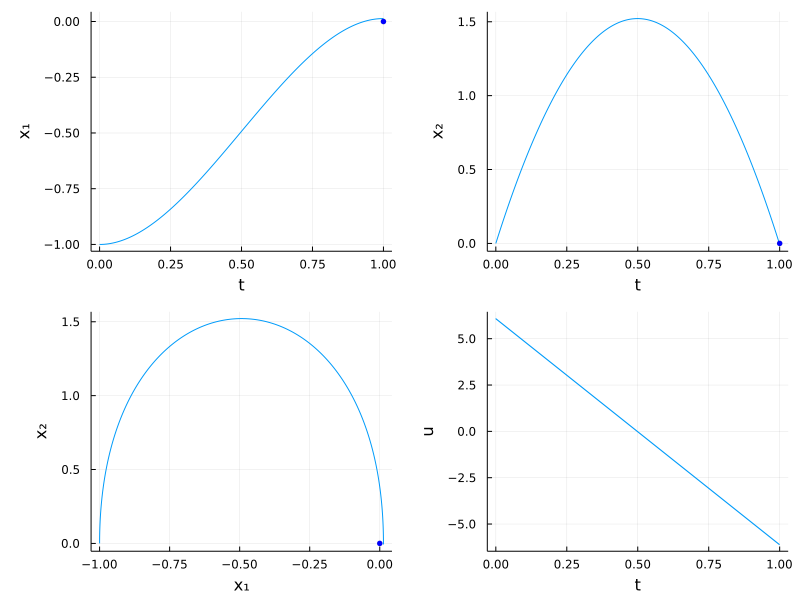

In [4]:
m = length(T)
x1 = [ X[i][1] for i=1:m ]
x2 = [ X[i][2] for i=1:m ]
u  = [ U[i][1] for i=1:m-1 ]

ms = 3
x1_plot   = plot(T,  x1, xlabel = "t", ylabel = "x₁",  legend = false)
plot!(x1_plot, [T[m]], [xf[1]], color=:blue, seriestype=:scatter, markersize=ms, markerstrokewidth=0, legend=false)

x2_plot   = plot(T,  x2, xlabel = "t", ylabel = "x₂",  legend = false)
plot!(x2_plot, [T[m]], [xf[2]], color=:blue, seriestype=:scatter, markersize=ms, markerstrokewidth=0, legend=false)

x1x2_plot = plot(x1, x2, xlabel = "x₁", ylabel = "x₂",  legend = false)
plot!(x1x2_plot, [xf[1]], [xf[2]], color=:blue, seriestype=:scatter, markersize=ms, markerstrokewidth=0, legend=false)

u_plot    = plot(T,  vcat(u, u[end]), xlabel = "t", ylabel = "u",   legend = false, linetype=:steppre)

plot(x1_plot, x2_plot, x1x2_plot, u_plot, layout = (2,2), size=(800,600), left_margin=5mm)